# TP sur k-means

Dans ce TP, vous devrez coder l'algorithme k-means.

(emprunts au Python Data Science Handbook de Jake VDP)

In [1]:
%matplotlib inline
import sklearn
import numpy as np
import matplotlib.pyplot as plt

### Générons des données aléatoires:

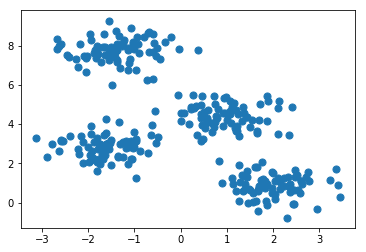

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

On obtient donc un tableau $X \in \mathbb{R}^{300 \times 2}$, donc avec 300 lignes et 2 colonnes


### Ecriture de la fonction `find_clusters`

Le but de cette partie sera de complêter le code de la fonction `find_clusters` ci-dessous, afin qu'elle réalise un k-means.

Lisez attentivement le code incomplet de la fonction `find_clusters` ci-dessous. Dans le code, j'utilise les trois points `...`, ce qui correspond en python à l'instruction "ne rien faire".

**Exercice**: Exécutez la fonction `find_clusters` et expliquez ce que cette fonction renvoie (et pourquoi elle renvoie cela).

**Exercice**: Ecrivez une fonction `dist(x,y)` qui calcule la distance euclidienne entre les vecteurs `x` et `y`.

**Exercice**: Remplacez les `...` de cette fonction par les instructions manquantes pour obtenir un algorithme de k-means. Vérifiez que cette fonction marche bien en affichant le résultat (voir ci-dessous)

**Exercice (bonus)**: Modifiez l'algorithme pour qu'au lieu que les représentants des clusters soient leur barycentre, on choisisse à la place le point de `X` le plus proche du barycentre.

In [3]:
def dist(x,y):
    return (np.sqrt(np.sum((x - y) ** 2)))

In [6]:
from sklearn.cluster import KMeans
def find_clusters(X, K):
    # n=nb d'exemples, d=nb de variables, K=nb de clusters
    #The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
    #Each point is closer to its own cluster center than to other cluster centers.
    #find_clusters renvoie le cluster le plus proche des points et le centre des clusters par rapport à la moyenne

    n,d = X.shape

    indices   = np.random.choice(range(n),size=K)
    centroids = X[indices,:]                     # centroids[i] est un vecteur de dimension d, egale au ième centroid.
    labels    = np.random.randint(K,size=n)      # labels[i]   indique le numero du cluster affecté à X[i]
    

    while True:
        # Pour chaque point X[i], trouver le cluster qui est le plus proche, et le ranger dans labels[i]
        for i in range(n):
            clus=0
            distancedep =dist(X[i],centroids[0])
            for k in range(K):
                if dist(X[i],centroids[k])<distancedep:
                    clus=k
                    distancedep=dist(X[i],centroids[k])
            labels[i]=clus
                
        # Mettre a jour les centroids
            new_centroids = np.zeros((K,d))
            
        # calculer le centroid du cluster k, et le stocker dans new_centroids[k]
        #Find new centers from means of points
        for k in range(K):
            # calculer le centroid du cluster k, et le stocker dans new_centroid[k]
            nbClus = 0
            sumPr = np.zeros(d)
            for i in range(n):
                if labels[i] == k:
                    nbClus = nbClus + 1
                    for dim in range(d):
                        sumPr[dim] += X[i,dim]
            for dim in range(d):
                sumPr[dim] = sumPr[dim]/nbClus
            new_centroids[k] = sumPr
        for k in range(K):
            clus=X[0]
            distance=dist(X[i],centroids[0])
            for i in range(n):
                if labels[i]==k:
                    if dist(X[i],new_centroids[k])<distance:
                        distance=dist(X[i],new_centroids[k])
                        clus=X[i]
            new_centroids[k]=clus
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
        #question bonus
        
    
    return centroids, labels

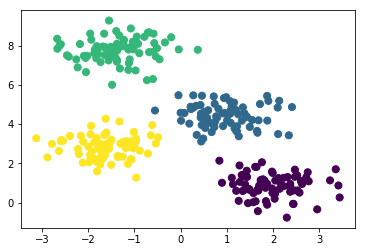

In [9]:
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
                s=50, cmap='viridis');

In [7]:
"Autre version ( sur skilearn)"
from sklearn.metrics import pairwise_distances_argmin

def find_clusters1(X, K, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:K]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(K)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels



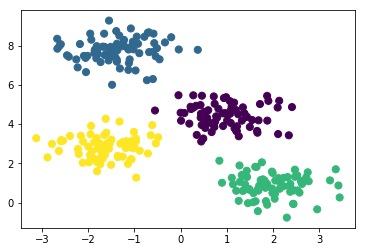

In [8]:
centers, labels = find_clusters1(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');